### Decision trees – Classification and Visualization 

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [2]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()     #Instantiate tree class
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [3]:
from sklearn.metrics import accuracy_score

y_pred = dtc.predict(X_test)
accuracy_score(y_test, y_pred)

0.9777777777777777

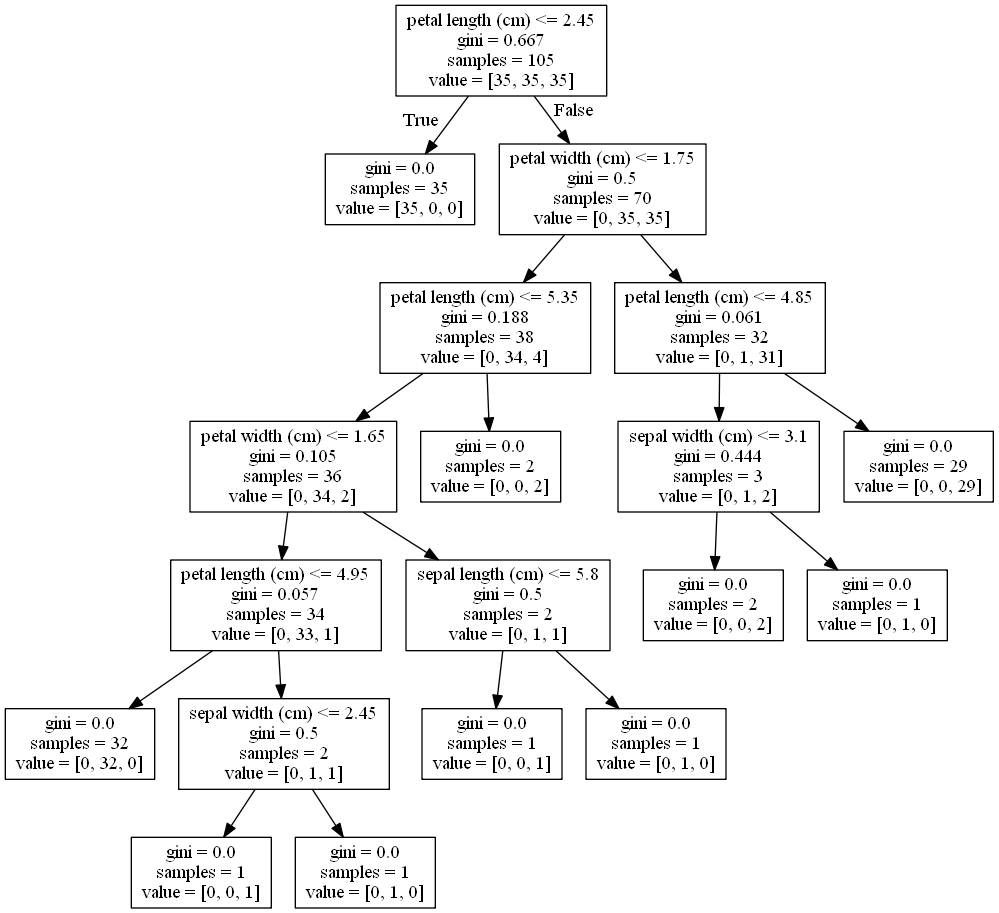

In [4]:
import numpy as np
from sklearn import tree
from sklearn.externals.six import StringIO
import pydot
from IPython.display import Image

dot_iris = StringIO() 
tree.export_graphviz(dtc, out_file = dot_iris, feature_names = iris.feature_names) 
graph = pydot.graph_from_dot_data(dot_iris.getvalue())
Image(graph.create_png())

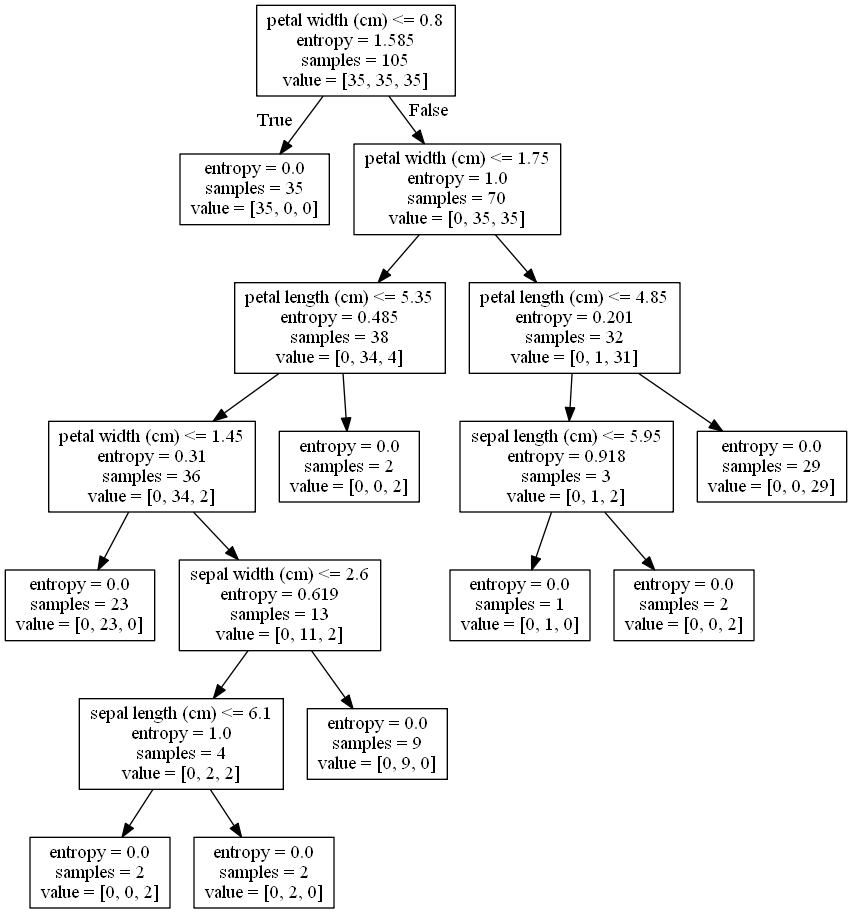

In [5]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, y_train)

dot_iris = StringIO() 
tree.export_graphviz(dtc, out_file = dot_iris, feature_names = iris.feature_names) 
graph = pydot.graph_from_dot_data(dot_iris.getvalue())
Image(graph.create_png())

### Tuning a decision tree 

In [6]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:,:2]
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [7]:
import pandas as pd
pd.DataFrame(X,columns=iris.feature_names[:2])

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()     #Instantiate tree with default parameters
dtc.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_pred = dtc.predict(X_test)
accuracy_score(y_test, y_pred)

0.6888888888888889

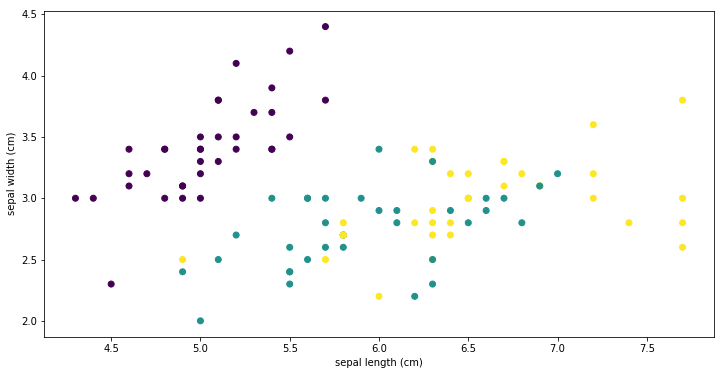

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=((12,6)))
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

In [9]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {'criterion':['gini','entropy'], 'max_depth' : [3,5,7,20]}

gs_inst = GridSearchCV(dtc,param_grid=param_grid,cv=5)
gs_inst.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [10]:
from sklearn.metrics import accuracy_score

y_pred_gs = gs_inst.predict(X_test)
accuracy_score(y_test, y_pred_gs)

0.8

In [11]:
gs_inst.grid_scores_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.73333, std: 0.06459, params: {'criterion': 'gini', 'max_depth': 3},
 mean: 0.70476, std: 0.03563, params: {'criterion': 'gini', 'max_depth': 5},
 mean: 0.71429, std: 0.06023, params: {'criterion': 'gini', 'max_depth': 7},
 mean: 0.69524, std: 0.07127, params: {'criterion': 'gini', 'max_depth': 20},
 mean: 0.72381, std: 0.08193, params: {'criterion': 'entropy', 'max_depth': 3},
 mean: 0.71429, std: 0.05216, params: {'criterion': 'entropy', 'max_depth': 5},
 mean: 0.71429, std: 0.05216, params: {'criterion': 'entropy', 'max_depth': 7},
 mean: 0.66667, std: 0.07968, params: {'criterion': 'entropy', 'max_depth': 20}]

In [12]:
gs_inst.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

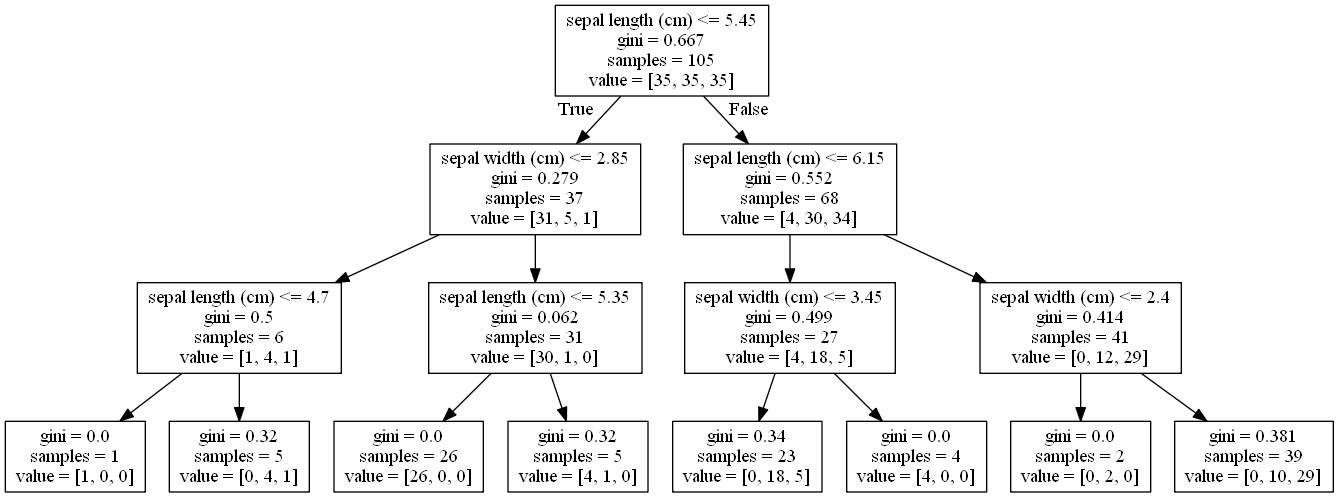

In [13]:
import numpy as np
from sklearn import tree
from sklearn.externals.six import StringIO

import pydot
from IPython.display import Image

dot_iris = StringIO()
tree.export_graphviz(gs_inst.best_estimator_, out_file = dot_iris, feature_names = iris.feature_names[:2])
graph = pydot.graph_from_dot_data(dot_iris.getvalue())

Image(graph.create_png())

In [28]:
rid_interval = 0.02

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

xmin, xmax = np.percentile(X[:, 0], [0, 100])
ymin, ymax = np.percentile(X[:, 1], [0, 100])

xmin_plot, xmax_plot = xmin - .5, xmax + .5
ymin_plot, ymax_plot = ymin - .5, ymax + .5

xx, yy = np.meshgrid(np.arange(xmin_plot, xmax_plot, grid_interval),
np.arange(ymin_plot, ymax_plot, grid_interval))

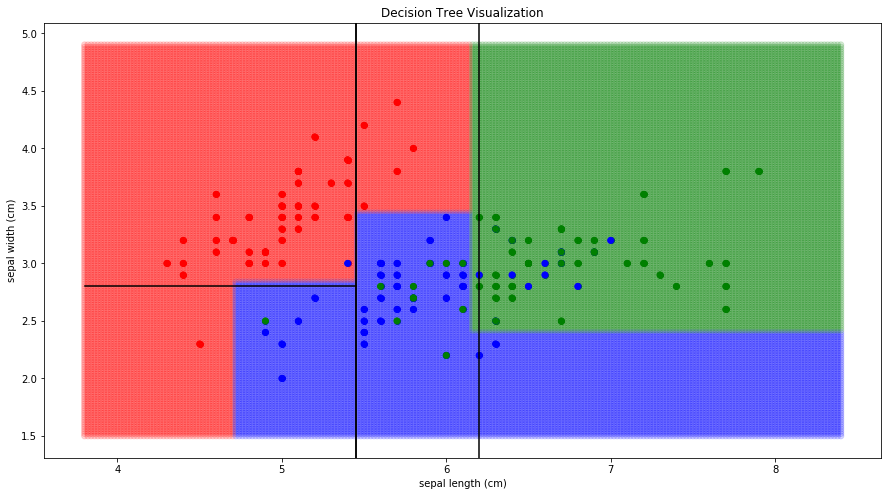

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

X_0 = X[y == 0]
X_1 = X[y == 1]
X_2 = X[y == 2]

plt.figure(figsize=(15,8)) #change figure-size for easier viewing
plt.scatter(X_0[:,0],X_0[:,1], color = 'red')
plt.scatter(X_1[:,0],X_1[:,1], color = 'blue')
plt.scatter(X_2[:,0],X_2[:,1], color = 'green')

test_preds = gs_inst.best_estimator_.predict(list(zip(xx.ravel(), yy.ravel())))

colors = np.array(['r', 'b','g'])
plt.scatter(xx.ravel(), yy.ravel(), color=colors[test_preds], alpha=0.15)
plt.scatter(X[:, 0], X[:, 1], color=colors[y])
plt.title("Decision Tree Visualization")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.axvline(x = 5.45,color='black') 
plt.axvline(x = 5.45, color='black')
plt.axvline(x = 6.2, color='black')
plt.plot((xmin_plot, 5.45), (2.8, 2.8), color='black')

Text(0,0.5,'Cross-validation Score')

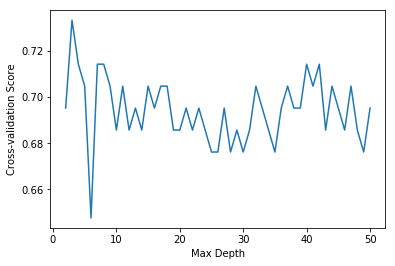

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()


from sklearn.model_selection import GridSearchCV, cross_val_score

max_depths = range(2,51)
param_grid = {'max_depth' : max_depths}

gs_inst = GridSearchCV(dtc, param_grid=param_grid,cv=5)
gs_inst.fit(X_train, y_train)

plt.plot(max_depths,gs_inst.cv_results_['mean_test_score'])
plt.xlabel('Max Depth')
plt.ylabel("Cross-validation Score")

### Using decision trees for regression 

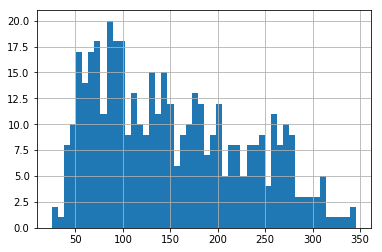

In [33]:
#Use within an Jupyter notebook
%matplotlib inline   

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

X_feature_names = ['age', 'gender', 'body mass index', 'average blood pressure','bl_0','bl_1','bl_2','bl_3','bl_4','bl_5']

pd.Series(y).hist(bins=50)

In [35]:
bins = 50*np.arange(8)
bins

array([  0,  50, 100, 150, 200, 250, 300, 350])

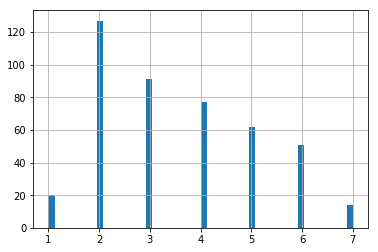

In [37]:
binned_y = np.digitize(y, bins)
pd.Series(binned_y).hist(bins=50)

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=binned_y)

In [39]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

72.88764044943821

In [40]:
(np.abs(y_test - y_pred)/(y_test)).mean()

0.6578449862249824

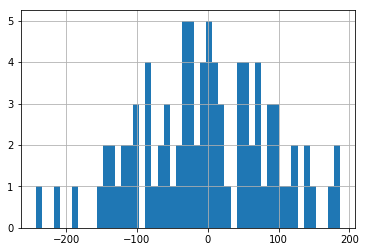

In [41]:
pd.Series((y_test - y_pred)).hist(bins=50)

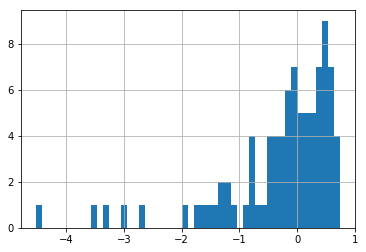

In [42]:
pd.Series((y_test - y_pred)/(y_test)).hist(bins=50)

### Reducing overfitting with cross-validation 

In [43]:
#Use within an Jupyter notebook
%matplotlib inline   

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

X_feature_names = ['age', 'gender', 'body mass index', 'average blood pressure','bl_0','bl_1','bl_2','bl_3','bl_4','bl_5']


bins = 50*np.arange(8)
binned_y = np.digitize(y, bins)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=binned_y)

In [44]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

from sklearn.model_selection import GridSearchCV

gs_inst = GridSearchCV(dtr, param_grid = {'max_depth': [3,5,7,9,20]},cv=10)
gs_inst.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 5, 7, 9, 20]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [45]:
gs_inst.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [46]:
y_pred = gs_inst.predict(X_test)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

49.24421716446313

In [47]:
(np.abs(y_test - y_pred)/(y_test)).mean()

0.44690969726641416

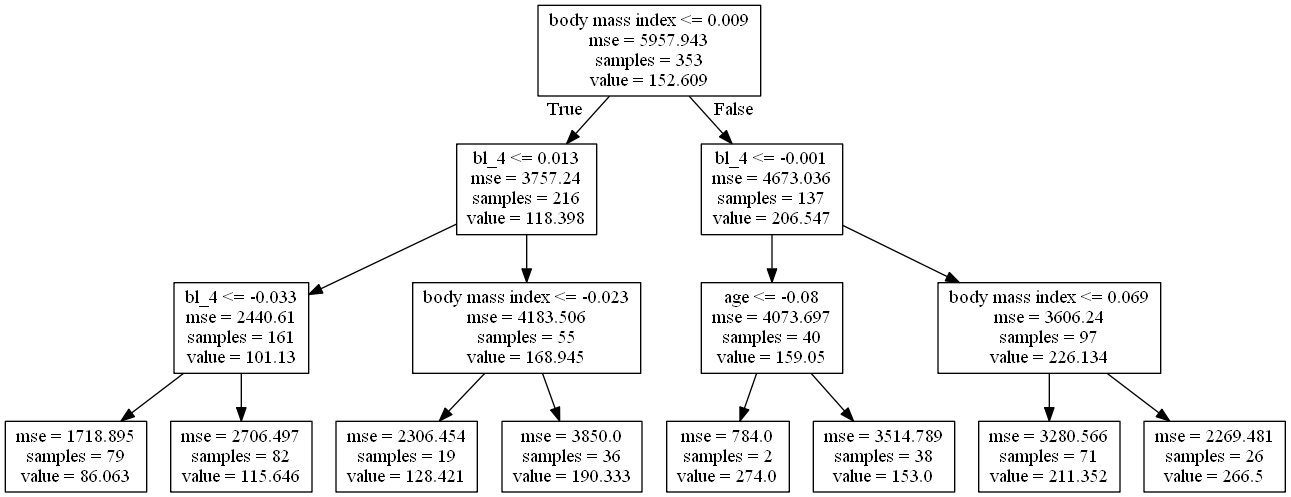

In [48]:
import numpy as np
from sklearn import tree
from sklearn.externals.six import StringIO

import pydot
from IPython.display import Image

dot_diabetes = StringIO()
tree.export_graphviz(gs_inst.best_estimator_, out_file = dot_diabetes, feature_names = X_feature_names)
graph = pydot.graph_from_dot_data(dot_diabetes.getvalue())
Image(graph.create_png())